# Project 2 - Ames Housing Data and Kaggle Challenge
## Revisited

When reviewing the various projects I completed during my time with General Assembly I found that Project 2, based on an existing Kaggle challenge, offered to most room for improvement. My notebooks were a mess: there was no clear organization to the repository as a whole and each individual notebook represented the full 'Data Science Process' (Cleaning through Model Deployment), each for a different list of features. 

While the project was not particularly complicated, the way in which I originally approached the project was: I now had a chance to improve upon the work I had done in a more succinct, cleaner manner. 

In [1]:
### MOVE OHE WITH GET DUMMIES TO THIS PAGE???? ### MOVE OHE WITH GET DUMMIES TO THIS PAGE????
### MOVE OHE WITH GET DUMMIES TO THIS PAGE???? ### MOVE OHE WITH GET DUMMIES TO THIS PAGE????
### MOVE OHE WITH GET DUMMIES TO THIS PAGE???? ### MOVE OHE WITH GET DUMMIES TO THIS PAGE????

**Imports:**

In [2]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

**Reading in Data**

In [3]:
#reading in training and testing data
ames_df = pd.read_csv('../datasets/train_clean.csv')
ames_test_df = pd.read_csv('../datasets/test_clean.csv')

In [4]:
ames_df.shape, ames_test_df.shape

((2051, 79), (878, 78))

In [5]:
ames_df.columns

Index(['ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area', 'street',
       'alley', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod/add', 'roof_style', 'roof_matl', 'exterior_1st',
       'exterior_2nd', 'mas_vnr_type', 'mas_vnr_area', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2',
       'bsmt_unf_sf', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air',
       'electrical', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf',
       'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath',
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'kitchen_qual',
       'totrms_abvgrd', 'functional', 'fireplaces', 'fireplace_qu',
       'garage_type', 'garage_yr_blt', 'garage_finish', 'gara

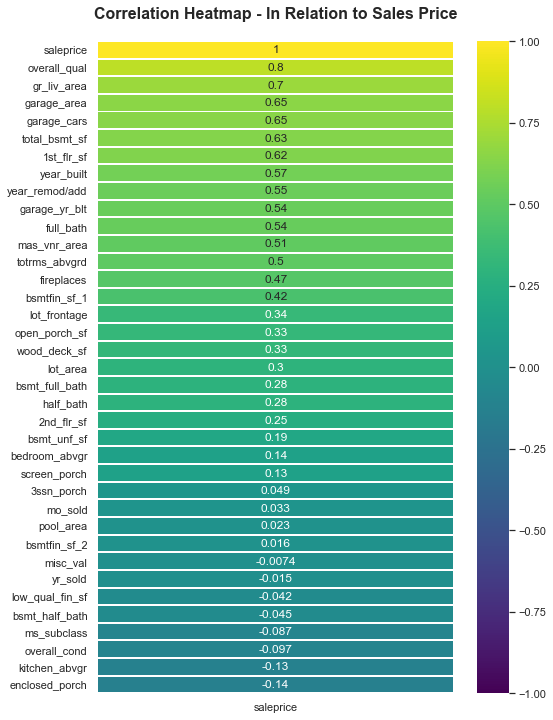

In [6]:
#observing the one column correlation matrix to decide on what features to build a model
plt.figure(figsize = (8, 12))

plt.title('Correlation Heatmap - In Relation to Sales Price',
          fontsize = 16,
          fontweight = 'bold',
          y = 1.025)

sns.heatmap(ames_df.corr()[['saleprice']].sort_values('saleprice', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            linewidths = 1,
            cmap='viridis');

In [7]:
ames_corr = ames_df.corr()['saleprice'][:-1]
list_feats = ames_corr[(ames_corr > 0.25)].sort_values(ascending = False).keys()
list_feats

Index(['overall_qual', 'gr_liv_area', 'garage_area', 'garage_cars',
       'total_bsmt_sf', '1st_flr_sf', 'year_built', 'year_remod/add',
       'garage_yr_blt', 'full_bath', 'mas_vnr_area', 'totrms_abvgrd',
       'fireplaces', 'bsmtfin_sf_1', 'lot_frontage', 'open_porch_sf',
       'wood_deck_sf', 'lot_area', 'bsmt_full_bath', 'half_bath'],
      dtype='object')

In [8]:
len(list_feats)

20

## Addressing Remaining Null Values

In [9]:
ames_df.isna().sum().sort_values(ascending = False)[0:28]

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        22
mas_vnr_type        22
bsmt_full_bath       2
bsmt_half_bath       2
garage_area          1
garage_cars          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
3ssn_porch           0
screen_porch         0
dtype: int64

In [10]:
ames_test_df.isna().sum().sort_values(ascending = False)[0:20]

pool_qc           874
misc_feature      837
alley             820
fence             706
fireplace_qu      422
lot_frontage      160
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
garage_type        44
bsmtfin_type_2     25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmt_qual          25
electrical          1
mas_vnr_type        1
mas_vnr_area        1
totrms_abvgrd       0
dtype: int64

In [11]:
for col in list_feats:
    print(f'{col}: {ames_df[col].isna().sum()}')

overall_qual: 0
gr_liv_area: 0
garage_area: 1
garage_cars: 1
total_bsmt_sf: 1
1st_flr_sf: 0
year_built: 0
year_remod/add: 0
garage_yr_blt: 114
full_bath: 0
mas_vnr_area: 22
totrms_abvgrd: 0
fireplaces: 0
bsmtfin_sf_1: 1
lot_frontage: 330
open_porch_sf: 0
wood_deck_sf: 0
lot_area: 0
bsmt_full_bath: 2
half_bath: 0


In [12]:
#checking nulls for garage qualities
ames_df[ames_df['garage_area'].isna()][['garage_yr_blt', 'garage_cars', 'garage_area']].head()

#the data indicates the house has no garage, I can fill garage_cars and garage_area with 0

,garage_yr_blt,garage_cars,garage_area
1712,NaN,NaN,NaN


In [13]:
ames_df['garage_area'].fillna(0, inplace = True)
ames_df['garage_cars'].fillna(0, inplace = True)

In [14]:
#repeating for the testing data:
ames_test_df['garage_area'].fillna(0, inplace = True)
ames_test_df['garage_cars'].fillna(0, inplace = True)

In [15]:
ames_df[ames_df['garage_yr_blt'].isna()][['garage_yr_blt', 'garage_cars', 'garage_area']].head()

,garage_yr_blt,garage_cars,garage_area
28,NaN,0.0,0.0
53,NaN,0.0,0.0
65,NaN,0.0,0.0
79,NaN,0.0,0.0
101,NaN,0.0,0.0


- If Garage Year Built is null for a house one would assume that there is no garage. I can't .fillna() with a value of 0, it doesn't make sense for what the value represents. I am going to replace the 'garage_yr_blt' nulls with the median value. 

In [16]:
ames_df['garage_yr_blt'].median(), ames_test_df['garage_yr_blt'].median()

(1980.0, 1978.0)

In [17]:
ames_df['garage_yr_blt'].fillna(value = ames_df['garage_yr_blt'].median(), inplace = True)

In [18]:
#repeating for the testing data:
ames_test_df['garage_yr_blt'].fillna(value = ames_test_df['garage_yr_blt'].median(), inplace = True)

In [19]:
ames_df[ames_df['total_bsmt_sf'].isna()][['bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
                                         'bsmtfin_type_1', 'bsmtfin_sf_1', 'bsmtfin_type_2',
                                         'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ames_df['total_bsmt_sf'].fillna(0, inplace = True)

In [21]:
#repeating for the testing data:
ames_test_df['total_bsmt_sf'].fillna(0, inplace = True)

In [22]:
#the column bsmtfin_sf_1 is also an element of my list_feats so I will also fill this value with 0:
ames_df['bsmtfin_sf_1'].fillna(0, inplace = True)

In [23]:
#repeating for the testing data:
ames_test_df['bsmtfin_sf_1'].fillna(0, inplace = True)

In [24]:
#checking nulls for 'msn_vnr_area'
ames_df[ames_df['mas_vnr_area'].isna()][['mas_vnr_area', 'mas_vnr_type']].head()

#all instances where mas_vnr_type is null, mas_vnr_area is also null

,mas_vnr_area,mas_vnr_type
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN


- If Masonry Veneer Area is null for a house one would assume that there is no exterior masonry. This is further confirmed by the fact that 'mas_vnr_type' is null for all instances where 'mas_vnr_area' is null. These null values can be filled with zero.

In [25]:
#the median value of 'mas_vnr_area' also happens to be zero
ames_df['mas_vnr_area'].median()

0.0

In [26]:
ames_df['mas_vnr_area'].fillna(0, inplace = True)

In [27]:
#repeating for the testing data:
ames_test_df['mas_vnr_area'].fillna(0, inplace = True)

In [28]:
#checking nulls for 'lot_frontage'
ames_df[ames_df['lot_frontage'].isna()].head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,198000


- If Lot Frontage is null for a house one would assume the property is not adjacent to a road, however many of the homes above have garages. I am therefore going to replace the 'lot_frontage' nulls with the median value. 

In [29]:
ames_df['lot_frontage'].median(), ames_test_df['lot_frontage'].median()

(68.0, 68.0)

In [30]:
ames_df['lot_frontage'].fillna(value = ames_df['lot_frontage'].median(), inplace = True)

In [31]:
#repeating for the testing data:
ames_test_df['lot_frontage'].fillna(value = ames_test_df['lot_frontage'].median(), inplace = True)

In [32]:
#I know one of the two 'bsmt_full_bath' null values will belong to index 1327, a house with no basement
ames_df[ames_df['bsmt_full_bath'].isna()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
616,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1959,1996,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,3820,0,0,3820,NaN,NaN,3,1,5,1,Ex,11,Typ,2,Gd,Attchd,1959.0,Unf,2.0,624.0,TA,TA,Y,0,372,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,284700
1327,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [33]:
#observing the data, the house represented by index 616 also doesn't have a basement, 
#filling 'bsmt_full_bath' null values with 0s.
ames_df['bsmt_full_bath'].fillna(0, inplace = True)

In [34]:
#repeating for the testing data:
ames_test_df['bsmt_full_bath'].fillna(0, inplace = True)

In [35]:
#for ease of reference

for col in list_feats:
    print(f'{col}: {ames_df[col].isna().sum()}')

overall_qual: 0
gr_liv_area: 0
garage_area: 0
garage_cars: 0
total_bsmt_sf: 0
1st_flr_sf: 0
year_built: 0
year_remod/add: 0
garage_yr_blt: 0
full_bath: 0
mas_vnr_area: 0
totrms_abvgrd: 0
fireplaces: 0
bsmtfin_sf_1: 0
lot_frontage: 0
open_porch_sf: 0
wood_deck_sf: 0
lot_area: 0
bsmt_full_bath: 0
half_bath: 0


- At this point all the null values for the features on which I plan to model have been addressed.

**Saving to .csv Files**

In [36]:
ames_df.to_csv('../datasets/train_clean.csv',
               index = False)

In [37]:
ames_test_df.to_csv('../datasets/test_clean.csv',
                    index = False)